In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install cmapPy
from cmapPy.pandasGEXpress.parse import parse

# Introduction

This notebook is a part of Assignment provided by Elucidata for 6 months internship in data science.

Goal of this notebook is to explore and analyse the cancers patient based on their genes structure.

**Cancers**
- Cancer arises from the transformation of normal cells into tumour cells in a multistage process that generally progresses from a pre-cancerous lesion to a malignant tumour.

- Cancer is a leading cause of death worldwide, accounting for an estimated 9.6 million deaths in 2018. The most common cancers are:

- Lung (2.09 million cases)
- Breast (2.09 million cases)
- Colorectal (1.80 million cases)
- Prostate (1.28 million cases)
- Skin cancer (non-melanoma) (1.04 million cases)
- Stomach (1.03 million cases)





**Pancreatic Adenocarcinoma (PAAD)** is the third most common cause of death from cancer, with an overall 5-year survival rate of less than 5%, and is predicted to become the second leading cause of cancer mortality in the United States by 2030.
- Cancer mortality can be reduced if cases are detected and treated early. In this assignment we are going to analyse the previous data of genes structure to detect the cancer patient and provide early treatment.

**Genes Structures:** Ribonucleic acid (RNA) is a polymeric molecule essential in various biological roles in coding, decoding, regulation and expression of genes. RNA and DNA are nucleic acids, and, along with lipids, proteins and carbohydrates, constitute the four major macromolecules essential for all known forms of life. RNA-Seq (RNA sequencing), is a sequencing technique to detect the quantity of RNA in a biological sample at a given moment.

**Data Exploration**
- Here we have a dataset of normalized RNA Sequencing reads for pancreatic cancer tumors. The measurement consists of ~20,000 genes for 183 pancreatic cancer tumors. The file format is GCT , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.

**GCT file:** The GCT file format, a tab-delimited text-based format pairing matrix expression values with row and column metadata, allowing comparison of both transcriptional and contextual differences across samples

In [18]:
data = parse('PAAD.gct')
print(type(data))

<class 'cmapPy.pandasGEXpress.GCToo.GCToo'>


In [19]:
# Read all portion of data
col_meta_data = data.col_metadata_df
row_meta_data = data.row_metadata_df
my_data = data.data_df

In [20]:
# drop columns which have constant value
for col in col_meta_data.columns:
    if len(col_meta_data[col].unique())<2:
        col_meta_data.drop(columns=col, inplace=True)

In [30]:
col_meta_data.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

**Visualizing the dataset to know about the Distributions of various attributes**

No handles with labels found to put in legend.


RNA sequence cluster:3.0 types patient is 24.16% of total 
RNA sequence cluster:4.0 types patient is 22.47% of total 
RNA sequence cluster:1.0 types patient is 21.91% of total 
RNA sequence cluster:5.0 types patient is 16.85% of total 
RNA sequence cluster:2.0 types patient is 14.61% of total 


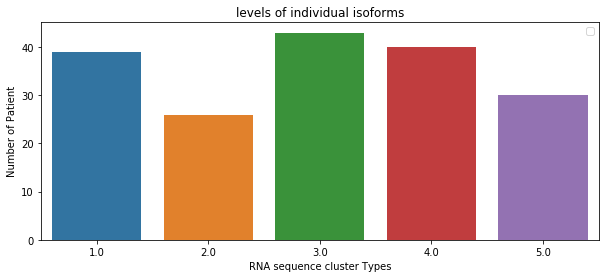

In [31]:
conts_mRNA = col_meta_data.mRNAseq_cluster.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=conts_mRNA.index,y=conts_mRNA.values,)
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('levels of individual isoforms')
plt.legend()
for i, index in enumerate(conts_mRNA.index):
    val = conts_mRNA.values[i]
    val_pcn = round(((val)/sum(conts_mRNA.values))*100, 2)
    print(f"RNA sequence cluster:{index} types patient is {val_pcn}% of total ")

Text(0.5, 1.0, 'Vital status of patient by mRNA sequence cluster types ')

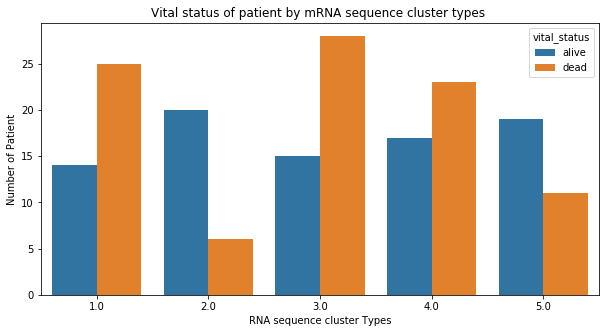

In [23]:
mRNA_seq_group = col_meta_data.groupby(['mRNAseq_cluster', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='mRNAseq_cluster', y='counts', hue='vital_status', data=mRNA_seq_group)
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('Vital status of patient by mRNA sequence cluster types ')

In [24]:
for cluster_type in mRNA_seq_group.mRNAseq_cluster.unique():
    data = mRNA_seq_group[mRNA_seq_group.mRNAseq_cluster==cluster_type]
    live_pcn = round((data[data['vital_status']=='alive']['counts']
                      /sum(data.counts.values))*100, 2)
    dead_pcn = round((data[data['vital_status']=='dead']['counts']/
                     sum(data.counts.values))*100, 2)
    print(f"mRNAseq_cluster type {cluster_type} patient dead {dead_pcn.values[0]}% times")
    print(f"mRNAseq_cluster type {cluster_type} patient alive {live_pcn.values[0]}% times")
    print("\n")

mRNAseq_cluster type 1.0 patient dead 64.1% times
mRNAseq_cluster type 1.0 patient alive 35.9% times


mRNAseq_cluster type 2.0 patient dead 23.08% times
mRNAseq_cluster type 2.0 patient alive 76.92% times


mRNAseq_cluster type 3.0 patient dead 65.12% times
mRNAseq_cluster type 3.0 patient alive 34.88% times


mRNAseq_cluster type 4.0 patient dead 57.5% times
mRNAseq_cluster type 4.0 patient alive 42.5% times


mRNAseq_cluster type 5.0 patient dead 36.67% times
mRNAseq_cluster type 5.0 patient alive 63.33% times




Text(0.5, 1.0, 'Vital status vs cancer type ')

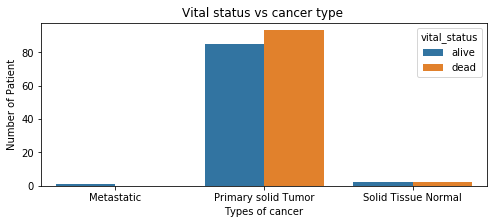

In [25]:
sample_type_group = col_meta_data.groupby(['sample_type', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(8, 3))
sns.barplot(x='sample_type', y='counts', hue='vital_status', data=sample_type_group)
plt.ylabel('Number of Patient')
plt.xlabel('Types of cancer')
plt.title('Vital status vs cancer type ')

Types of tumer not play role in current vital status of patient. There is 50-50 chance of patient are currently alive or dead

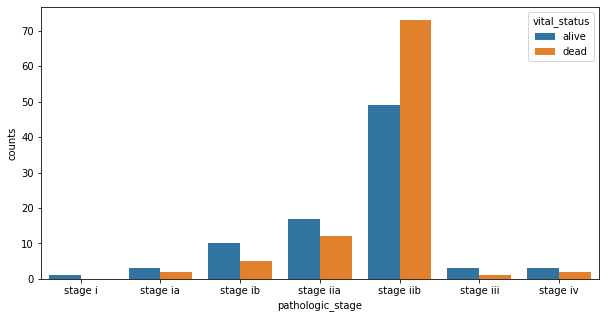

In [26]:
pathologic_stage_group = col_meta_data.groupby(['pathologic_stage', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_stage', y='counts', hue='vital_status', data=pathologic_stage_group)

**pathologic stages are as follow:**

**stage 0:** Abnormal cells are present but have not spread to nearby tissue.Data set have not this stage because approx all adenocarcinoma_invasion value is True.

**stage i, stage ii,stage iii** Cancer is present. The higher the number, the larger the cancer tumor and the more it has spread into nearby tissues.

**stage iv** The cancer has spread to distant parts of the body.

**Again parsing the data to set index and handel missing values**

In [3]:
#Again parsing the gct data using cmappy

data_row = parse('PAAD.gct',).data_df                     #expressional data
data_col = parse('PAAD.gct',col_meta_only=True).T         #informational data

In [4]:
#setting index and visualize the top 5 data rows of expressional data
data_row=data_row.set_index(data_row.axes[0]) 
data_row.head(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


In [5]:
#visualize the top 5 data columns of informational data
data_col.head(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,aabi,...,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d,a8sy,a8lh,aapl
sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,...,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
mRNAseq_cluster,1,2,3,1,4,3,3,2,2,3,...,2,5,3,4,5,NaN,2,3,1,5
bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,tcga-2j-aabh,tcga-2j-aabi,...,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl
bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,c53328b4-0930-4e6a-a648-283b5565295e,2aaf212f-000a-4a9d-8a4a-198fa94f491e,...,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec


In [6]:
#shape of expressional data
data_col.shape

(124, 183)

**Missing data handling**

In [7]:
#checking null value and counting 
data_row.isnull().sum().sum()

134954

In [8]:
#dropping null values
data_row = data_row.dropna()

In [9]:
#checking null value and counting after dropping null values
data_row.isnull().sum().sum()

0

In [10]:
#Slicing two informational columns
data_col1=data_col.loc[['histological_type','histological_type_other']]

In [11]:
#visuslising sliced informational column
data_col1.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,NaN,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated",NaN,NaN,NaN,NaN,NaN,NaN,invasive adenocarcinoma,poorly differentiated adenocarcinoma,...,NaN,NaN,NaN,NaN,moderately differentiated ductal adenocarcinom...,NaN,NaN,NaN,NaN,NaN


In [12]:
#checking null value and counting row wise
for i in range(len(data_col1.index)) :
    print("Nan in row ", i , " : " ,  data_col1.iloc[i].isnull().sum())


Nan in row  0  :  1
Nan in row  1  :  156


In [13]:
#taking most occurence value for imputing in place of null
data_col1.loc['histological_type'].mode()

0    pancreas-adenocarcinoma ductal type
dtype: object

In [14]:
#filling null values by most occurence value 
data_col1.loc['histological_type'].fillna('pancreas-adenocarcinoma ductal type',inplace=True)
data_col1.loc['histological_type_other'].fillna('pancreas-adenocarcinoma ductal type',inplace=True)

In [15]:
#checking null value and counting 
data_col1.isnull().sum().sum()

0

In [16]:
#visuslising sliced informational column
data_col1.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated",pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,invasive adenocarcinoma,poorly differentiated adenocarcinoma,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,moderately differentiated ductal adenocarcinom...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


In [27]:
#checking unique values in data
data_col1.iloc[1,].unique()

array(['invasive adenocarcinoma', 'invasive, well-differentiated',
       'pancreas-adenocarcinoma ductal type',
       'poorly differentiated adenocarcinoma', 'neuroendocrine',
       'neuroendocrine carcinoma nos',
       '82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma',
       'adenocarcinoma, nos',
       'poorly differentiated pancreatic adenocarcinoma', 'not specified',
       'intraductal tubulopapillary neoplasm',
       'ductal and micropapillary', 'adenocarcinoma- nos',
       'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%'],
      dtype=object)

In [28]:
dataset = data_row.transpose()

In [29]:
#visuslising expressional column
dataset.head()

rid,SLC35E2,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,7.45,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,...,8.6,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3
aab4-Primary solid Tumor,8.10,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,...,8.7,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9
aab6-Primary solid Tumor,7.20,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,...,8.8,8.4,9.1,3.9,8.1,10.0,9.4,13.5,9.8,9.2
aab8-Primary solid Tumor,8.00,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,...,8.6,8.6,8.9,5.2,8.5,9.7,9.4,12.5,9.7,9.3
aab9-Primary solid Tumor,7.65,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,...,8.9,8.2,8.4,5.9,8.6,9.9,9.3,13.0,10.1,9.2


**Performing PCA and visualizing**

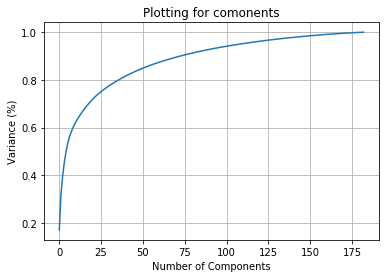

In [33]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA().fit(dataset)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Plotting for comonents')
plt.show()

In [34]:
#applying pca to dataset
n_components=125
pca = PCA(n_components)
df = pca.fit_transform(dataset)

In [35]:
pca.explained_variance_ratio_.cumsum()

array([0.17050831, 0.3189652 , 0.39602359, 0.45375443, 0.49700183,
       0.5329874 , 0.55876165, 0.57924666, 0.59671262, 0.61180166,
       0.62494914, 0.63670335, 0.64821223, 0.65853729, 0.66853474,
       0.67816812, 0.6873113 , 0.69577688, 0.70404649, 0.71189046,
       0.71947349, 0.72635291, 0.7329375 , 0.73919909, 0.74517387,
       0.75071808, 0.75621903, 0.76157595, 0.76672019, 0.77170027,
       0.77643312, 0.78101873, 0.7855184 , 0.78994316, 0.79415146,
       0.79833513, 0.80242807, 0.80628098, 0.81004003, 0.8137596 ,
       0.81736123, 0.82092183, 0.82438382, 0.82780639, 0.83111099,
       0.83434445, 0.8375068 , 0.84054777, 0.84354318, 0.84649455,
       0.8493398 , 0.85215035, 0.85492686, 0.8575891 , 0.86021415,
       0.86278133, 0.86532678, 0.86778848, 0.8701881 , 0.87256609,
       0.87489477, 0.87714756, 0.87936842, 0.88156151, 0.88370007,
       0.88578414, 0.88785093, 0.88990034, 0.89191065, 0.89385892,
       0.89578675, 0.89767267, 0.89952941, 0.90137382, 0.90318

In [36]:
df.shape


(183, 125)

In [37]:
#placing column name and generating dataframe
df1=pd.DataFrame(df,columns=['PCA'+str(i) for i in range(1,n_components+1)],index=None)

In [38]:
#visualize the top 5 row
df1.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125
0,19.377602,-14.983461,-2.223560,-29.369322,1.294313,-0.555344,-13.681491,-10.432153,-0.366904,-5.873956,...,0.564694,-4.781080,-3.857752,1.011392,2.754386,5.703553,2.576758,7.982373,1.236606,6.231236
1,6.459739,-7.324452,-1.891195,-27.630188,-16.984523,6.185806,6.002576,-13.808435,-11.949465,-14.810990,...,-3.101787,4.929942,6.635761,7.075560,4.612033,1.245373,-0.710394,0.525158,-5.049880,1.215465
2,22.107028,-12.287158,-8.406870,52.940943,-28.743129,-6.388730,12.774998,-13.569374,-22.681701,1.003886,...,2.615702,-1.671115,-1.284027,-4.124928,-0.618950,-2.742274,1.163390,-1.389201,0.319828,-1.226881
3,14.004186,-25.846380,2.487067,13.669215,-4.051808,13.900233,-19.943554,6.014178,9.325527,9.484752,...,4.430746,-1.279218,-0.931211,1.807246,-2.345371,2.619167,-3.308964,4.123351,1.794412,-2.053140
4,-14.081426,-4.000459,-13.408861,-10.858805,-13.067221,-16.657837,20.383552,9.752666,-0.402855,-2.505444,...,0.851909,-2.942329,-4.955079,0.607524,0.552954,-0.037825,-0.007779,3.002031,-4.695871,-6.291027


In [39]:
df1.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125
count,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,...,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,4.969916e-15,-1.863719e-15,1.242479e-15,-1.397789e-15,-4.348677e-15,6.600670e-16,2.640268e-15,-5.435846e-16,-1.863719e-15,-5.435846e-16,...,-1.977774e-16,2.936328e-16,7.183082e-16,1.087169e-15,3.543007e-16,1.941374e-16,9.512731e-16,8.736181e-16,1.759370e-16,6.163861e-16
std,4.284278e+01,3.997653e+01,2.880148e+01,2.492923e+01,2.157669e+01,1.968199e+01,1.665704e+01,1.484988e+01,1.371201e+01,1.274488e+01,...,3.238731e+00,3.208488e+00,3.191851e+00,3.178784e+00,3.118834e+00,3.097191e+00,3.090201e+00,3.079531e+00,3.062795e+00,3.021993e+00
min,-9.902540e+01,-4.500110e+01,-7.530460e+01,-4.727105e+01,-3.511936e+01,-6.895490e+01,-2.739740e+01,-3.490054e+01,-4.780983e+01,-4.126018e+01,...,-8.907317e+00,-9.254316e+00,-9.601037e+00,-9.487342e+00,-1.230808e+01,-8.579651e+00,-9.034811e+00,-9.069323e+00,-8.227354e+00,-8.730063e+00
25%,-3.117554e+01,-1.801936e+01,-1.509016e+01,-1.672742e+01,-1.203234e+01,-1.003183e+01,-1.161218e+01,-1.037354e+01,-7.151986e+00,-7.112201e+00,...,-2.105872e+00,-1.730073e+00,-1.787461e+00,-2.040794e+00,-1.992865e+00,-1.866619e+00,-1.815018e+00,-1.490159e+00,-1.791125e+00,-1.834577e+00
50%,-1.104452e+00,-7.984542e+00,-2.223560e+00,-2.885064e+00,-3.557351e+00,2.255364e+00,-2.430886e+00,3.665090e-01,1.351471e+00,-9.135725e-01,...,1.123593e-01,1.761496e-01,5.263448e-03,-1.743477e-01,-6.449036e-03,-5.341439e-02,-7.779431e-03,-1.242477e-01,-1.248752e-01,1.749892e-01
75%,2.966067e+01,1.964055e+00,1.880219e+01,1.292634e+01,6.722829e+00,1.179177e+01,9.619986e+00,9.174941e+00,8.630049e+00,5.784129e+00,...,1.813496e+00,1.550420e+00,1.786804e+00,1.808752e+00,1.978728e+00,1.541889e+00,1.987334e+00,1.598135e+00,1.661181e+00,1.726228e+00
max,1.502809e+02,2.163249e+02,7.991290e+01,1.111217e+02,1.361720e+02,7.073761e+01,5.835242e+01,5.754817e+01,6.552876e+01,5.291524e+01,...,9.297439e+00,1.052280e+01,9.650080e+00,1.181564e+01,1.380520e+01,9.937119e+00,9.441370e+00,1.028642e+01,9.216423e+00,1.517570e+01


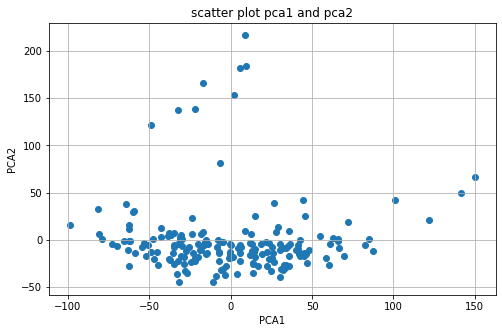

In [40]:
#scatter plot pca1 and pca2
plt.figure(figsize=(8,5))
plt.scatter(df1['PCA1'],df1['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot pca1 and pca2')
plt.grid()
plt.show()

In [41]:
df2=df1.copy()

In [42]:
#appending expressinal label to data
df2['label1']= list(data_col.iloc[0])
df2['label2']= list(data_col.iloc[1])

In [43]:
df2.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125,label1,label2
0,19.377602,-14.983461,-2.223560,-29.369322,1.294313,-0.555344,-13.681491,-10.432153,-0.366904,-5.873956,...,-3.857752,1.011392,2.754386,5.703553,2.576758,7.982373,1.236606,6.231236,aab1,Primary solid Tumor
1,6.459739,-7.324452,-1.891195,-27.630188,-16.984523,6.185806,6.002576,-13.808435,-11.949465,-14.810990,...,6.635761,7.075560,4.612033,1.245373,-0.710394,0.525158,-5.049880,1.215465,aab4,Primary solid Tumor
2,22.107028,-12.287158,-8.406870,52.940943,-28.743129,-6.388730,12.774998,-13.569374,-22.681701,1.003886,...,-1.284027,-4.124928,-0.618950,-2.742274,1.163390,-1.389201,0.319828,-1.226881,aab6,Primary solid Tumor
3,14.004186,-25.846380,2.487067,13.669215,-4.051808,13.900233,-19.943554,6.014178,9.325527,9.484752,...,-0.931211,1.807246,-2.345371,2.619167,-3.308964,4.123351,1.794412,-2.053140,aab8,Primary solid Tumor
4,-14.081426,-4.000459,-13.408861,-10.858805,-13.067221,-16.657837,20.383552,9.752666,-0.402855,-2.505444,...,-4.955079,0.607524,0.552954,-0.037825,-0.007779,3.002031,-4.695871,-6.291027,aab9,Primary solid Tumor


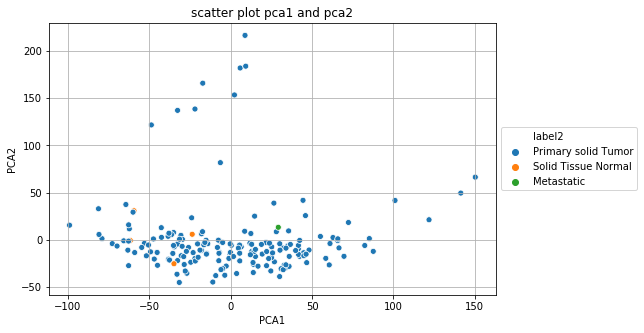

In [44]:
plt.figure(figsize=(8,5))
ax=sns.scatterplot(df2['PCA1'],df2['PCA2'],hue=df2['label2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot pca1 and pca2')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

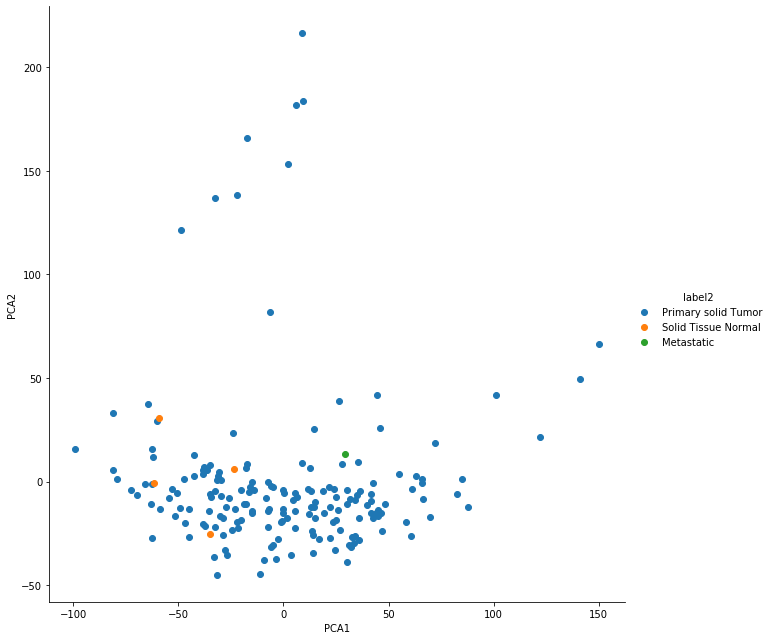

In [45]:
g =sns.FacetGrid(df2,hue='label2',height=9)
g.map(plt.scatter,'PCA1', 'PCA2').add_legend()
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df2['label2'])

In [49]:
def myplot(score,coeff,labels,y):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i+1], color = 'g', ha = 'center', va = 'center')
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

IndexError: index 183 is out of bounds for axis 0 with size 183

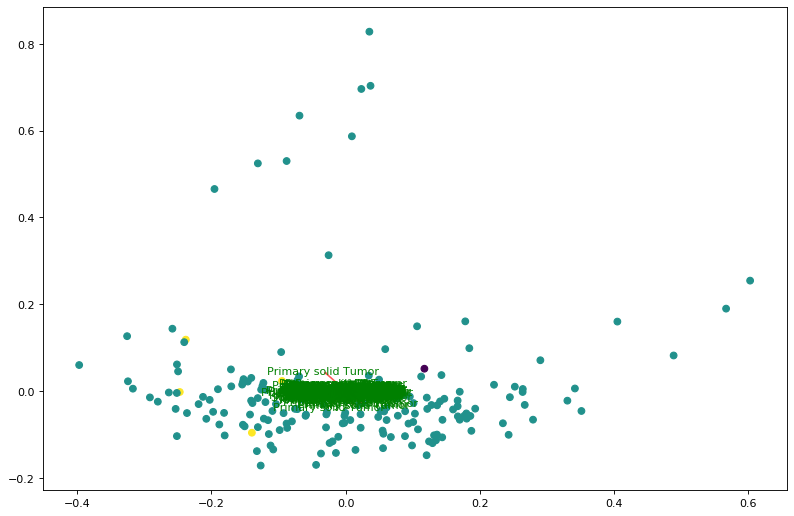

In [50]:
myplot(df[:,0:2],np.transpose(pca.components_[0:2, :]),df2['label2'].values,y)
plt.show()

**What does the analysis say about the general behaviour of the different samples?**

- Ans:- Adenocarcinoma sample are forming dense cluster while other one is showing greater variation like Neuroendocrine showing low denser.

**Are the neuroendocrine tumors clearly separable from the adenocarcinoma tumors?**

- Ans:- some neuroendocrine tumors are clrearly separable from adenocarcinoma tumors but very few are overlapped with adenocarcinoma tumors.

**What can be said about the variance of the PCA**

- Ans:- 96% variance is captured on eigen vector value 125.¶

# BONUS PART

In [56]:
#reading  Type 1 IFN signature
IFN = pd.read_csv('type1_IFN.txt',header=None)


In [57]:
IFN[0].values

array(['IFIT1', 'IFI44', 'IFIT3', 'MX2', 'OAS1', 'OAS3', 'BST2', 'IFITM1',
       'MX1', 'STAT1', 'IFI27', 'CXCL10', 'IFI16', 'IFI30', 'IFIH1',
       'IFIT2', 'IFITM2', 'IRF1', 'IRF9', 'IRGM', 'ISG15', 'OAS2',
       'PSME1', 'SOCS1', 'STAT2'], dtype=object)

In [65]:
#concat informational column and expressional column by condition
new_data =pd.concat([data_row.loc[IFN[0]],data_col1.drop('histological_type_other')])

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [66]:
#drop NaN value
hx=new_data.dropna()

In [67]:
hx.head(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
IFIT1,9.5,10.5,12.2,10.7,8.6,6.7,9,11.4,8.5,7.2,...,8.3,7.6,9.6,8.7,9.4,8.4,9.5,10.4,11.1,10.2
IFI44,9.4,11.1,11.2,10.6,8.8,8.4,9,11.1,8.6,7.9,...,8.3,8.3,9.8,10,9.3,8.9,9.3,10.6,10.8,10.9
IFIT3,10,10.8,11.6,10.3,9,7.8,9.4,11.5,9.1,9.1,...,7.9,8.3,9.8,9.8,9.6,9.1,9.6,10.5,10.7,10.2
MX2,9.8,10.7,11,10.8,8.3,9.2,9.9,11.1,9.2,9.2,...,9.3,9.2,10,9.2,9.7,9.3,10,11.4,11.5,10.9
OAS1,11.7,11,11.3,10.5,9.2,10.6,10.5,11.4,8.9,7.5,...,8.3,9.5,10.8,8.9,9.5,10.5,10.9,11.1,11.9,10.7


In [68]:
hx.tail(5)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
OAS2,11.5,11,11.8,11.4,9.1,9.9,10.5,12.1,9,8.9,...,9.3,9,10.5,9.5,10,10.1,10.5,11.3,12.1,12
PSME1,12.3,12.3,12,11.7,11.7,11,11.6,11.9,12.2,11.6,...,11.4,11.7,11.1,11.9,11.4,11.9,12,11.5,12.6,12.2
SOCS1,7.7,7.4,7.9,6.8,7.4,6.3,7.3,7.7,6.5,8.4,...,7.4,7.6,7.2,7.4,7.2,7.2,7.2,7.3,6,8.8
STAT2,11.2,11.3,12,11.7,11.1,11.6,11.4,11.8,10.9,11,...,11.3,11,11.3,11.4,11.1,11.3,11.1,11.8,10.8,11.7
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


In [69]:
#transposing 
X=hx.T

In [70]:
#slicing the values
X.iloc[:,1:].values

array([[9.399999618530273, 10.0, 9.800000190734863, ...,
        7.699999809265137, 11.199999809265137,
        'pancreas-adenocarcinoma-other subtype'],
       [11.100000381469727, 10.800000190734863, 10.699999809265137, ...,
        7.400000095367432, 11.300000190734863,
        'pancreas-adenocarcinoma-other subtype'],
       [11.199999809265137, 11.600000381469727, 11.0, ...,
        7.900000095367432, 12.0, 'pancreas-adenocarcinoma ductal type'],
       ...,
       [10.600000381469727, 10.5, 11.399999618530273, ...,
        7.300000190734863, 11.800000190734863,
        'pancreas-adenocarcinoma ductal type'],
       [10.800000190734863, 10.699999809265137, 11.5, ..., 6.0,
        10.800000190734863, 'pancreas-adenocarcinoma ductal type'],
       [10.899999618530273, 10.199999809265137, 10.899999618530273, ...,
        8.800000190734863, 11.699999809265137,
        'pancreas-adenocarcinoma ductal type']], dtype=object)

In [71]:
#taking groupby on histological_type
x1=X.groupby('histological_type').sum()/X.groupby('histological_type').count()

In [72]:
x1.head(5)

,IFIT1,IFI44,IFIT3,MX2,OAS1,OAS3,BST2,IFITM1,MX1,STAT1,...,IFIH1,IFIT2,IFITM2,IRF1,IRF9,ISG15,OAS2,PSME1,SOCS1,STAT2
histological_type,,,,,,,,,,,,,,,,,,,,,
pancreas-adenocarcinoma ductal type,9.181457,9.403974,9.670199,9.605960,10.250331,10.668212,11.466225,11.603311,11.093377,12.068212,...,9.417881,8.663576,12.055629,10.462252,10.666887,10.400662,10.360927,11.888742,6.851656,11.113907
pancreas-adenocarcinoma-other subtype,8.696296,8.374074,8.974074,8.862963,9.444444,9.996296,10.866667,10.862963,10.477778,11.414815,...,8.914815,7.959259,11.385185,10.170370,10.340741,9.692593,9.411111,11.703704,7.033333,10.885185
pancreas-colloid (mucinous non-cystic) carcinoma,8.800000,9.225000,9.825000,9.500000,10.625000,10.800000,10.375000,11.225000,11.025000,12.075000,...,9.575000,8.800000,11.275000,11.200000,10.325000,9.900000,10.450000,11.850000,7.100000,10.975000
pancreas-undifferentiated carcinoma,8.000000,9.700000,9.500000,8.200000,8.600000,10.000000,11.600000,12.900000,9.500000,12.500000,...,8.300000,8.400000,12.700000,10.700000,10.400000,10.200000,9.900000,11.600000,8.100000,11.300000


In [73]:
#setting up the dataframe
x2=pd.DataFrame(x1,index=None, columns=None).T

In [74]:
#visualize the top 5 row
x2.head()

histological_type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-colloid (mucinous non-cystic) carcinoma,pancreas-undifferentiated carcinoma
IFIT1,9.181457,8.696296,8.800,8.0
IFI44,9.403974,8.374074,9.225,9.7
IFIT3,9.670199,8.974074,9.825,9.5
MX2,9.605960,8.862963,9.500,8.2
OAS1,10.250331,9.444444,10.625,8.6


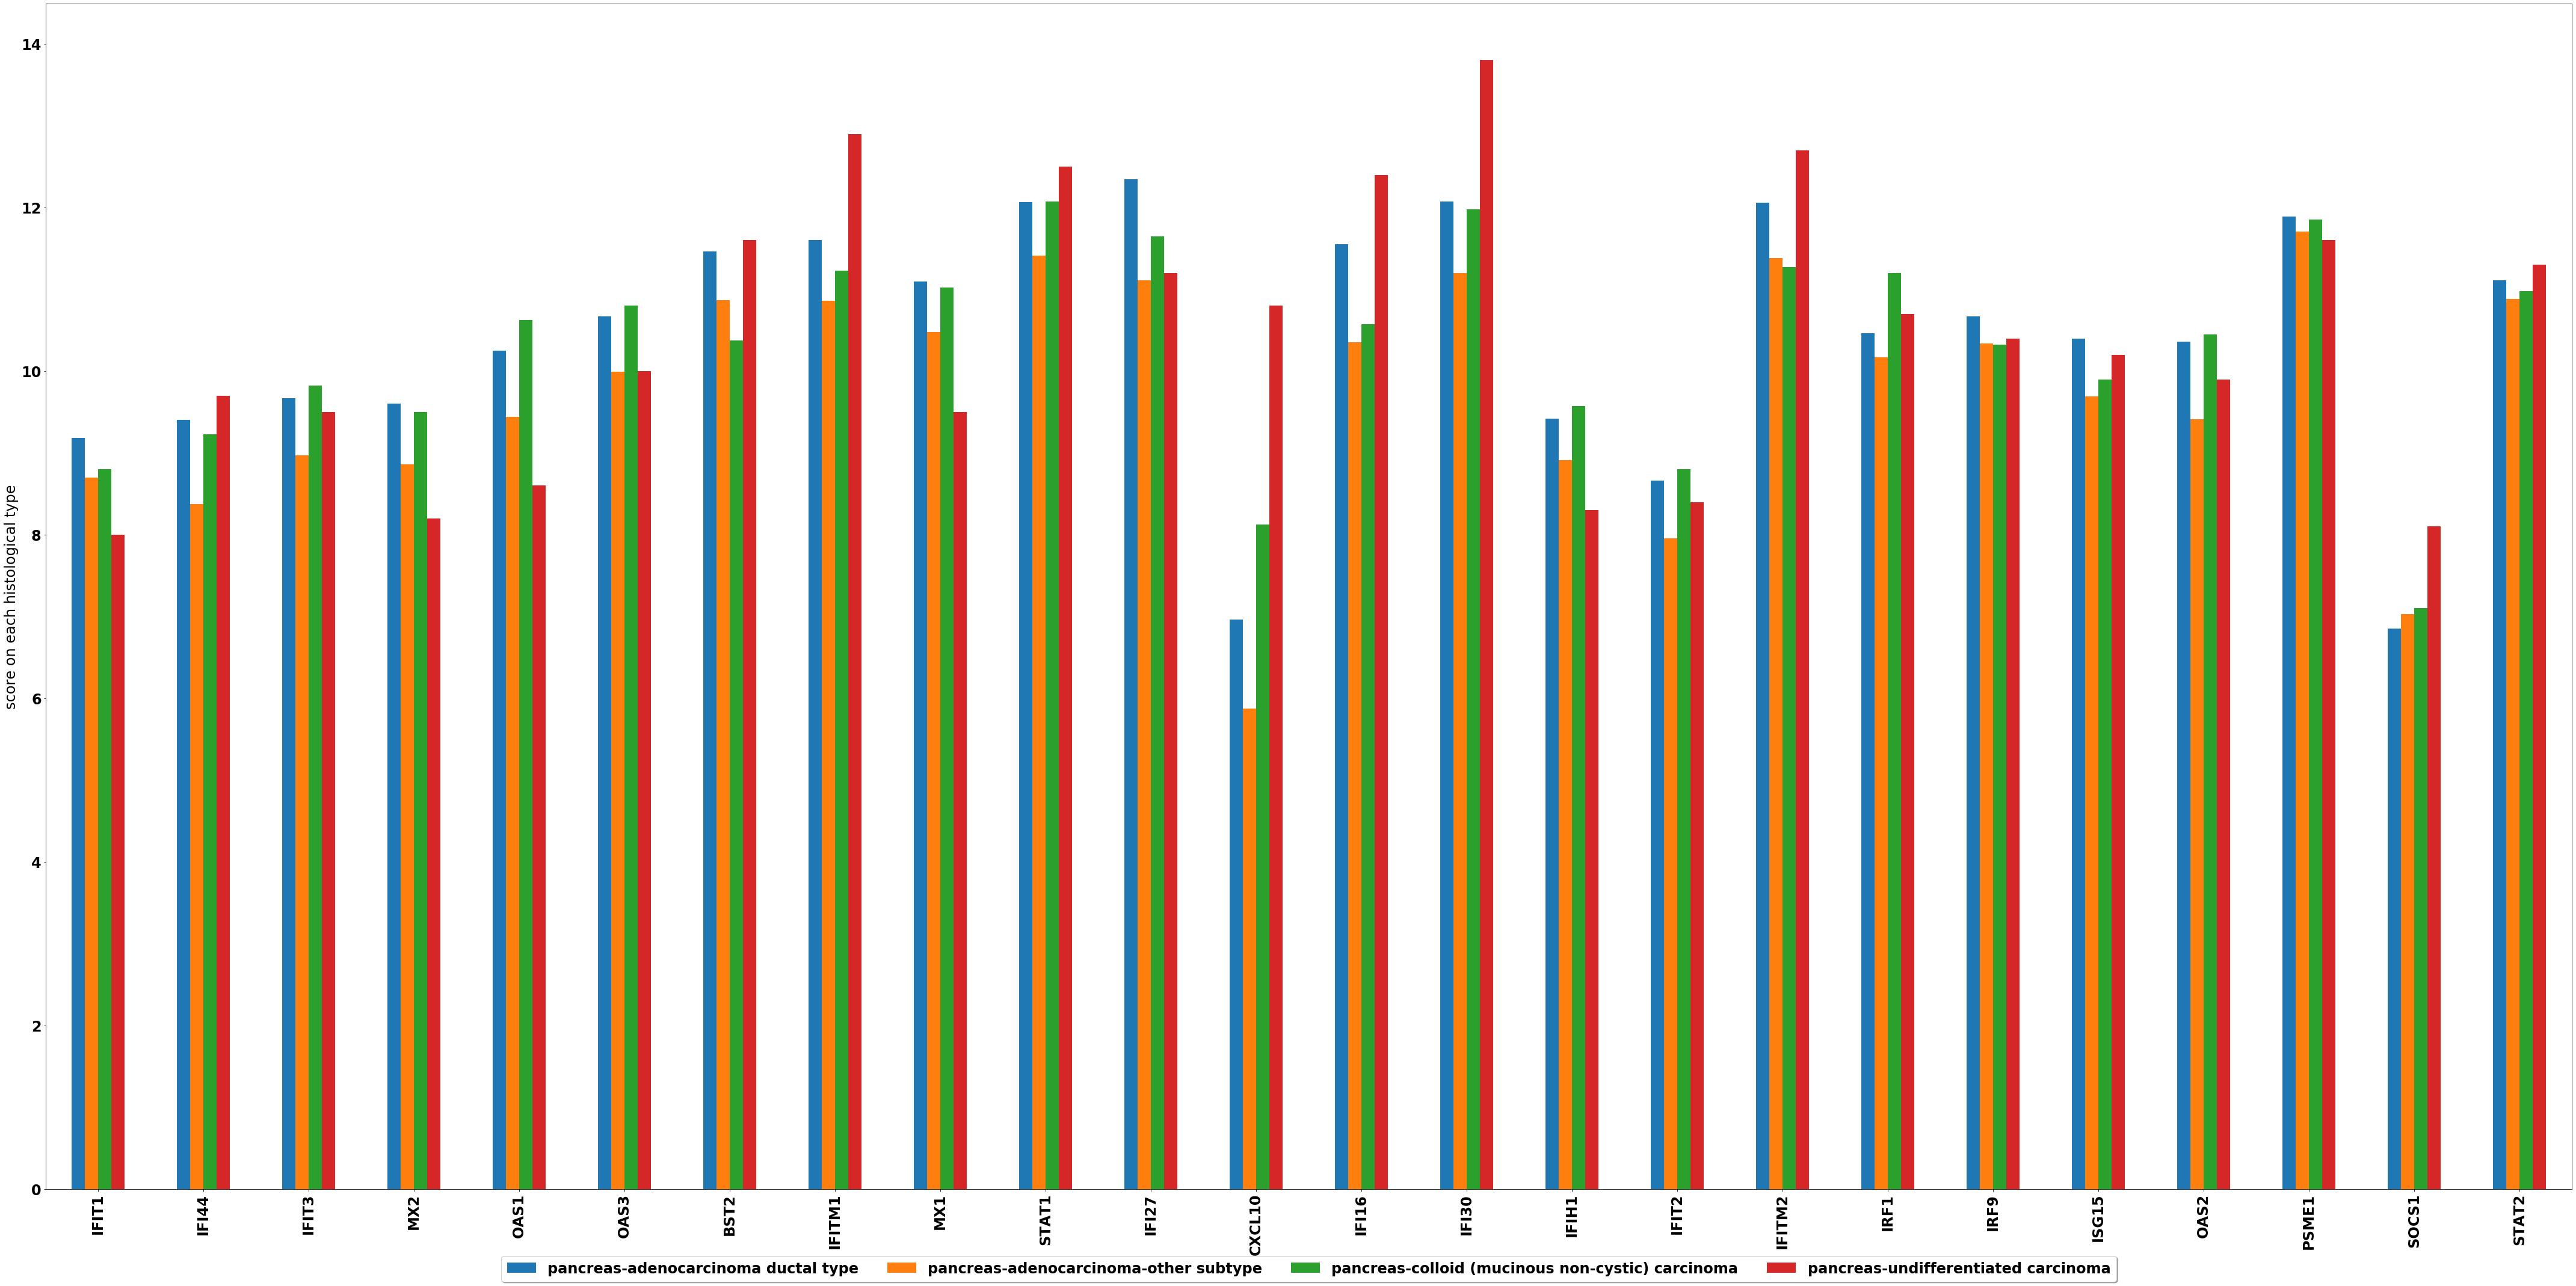

In [76]:
#plotting bar plot of each inferons present in histological type
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}

plt.rc('font', **font)

ax=x2.plot.bar(figsize = (60, 30))
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Type 1 IFN signature')
plt.ylabel('score on each histological type')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

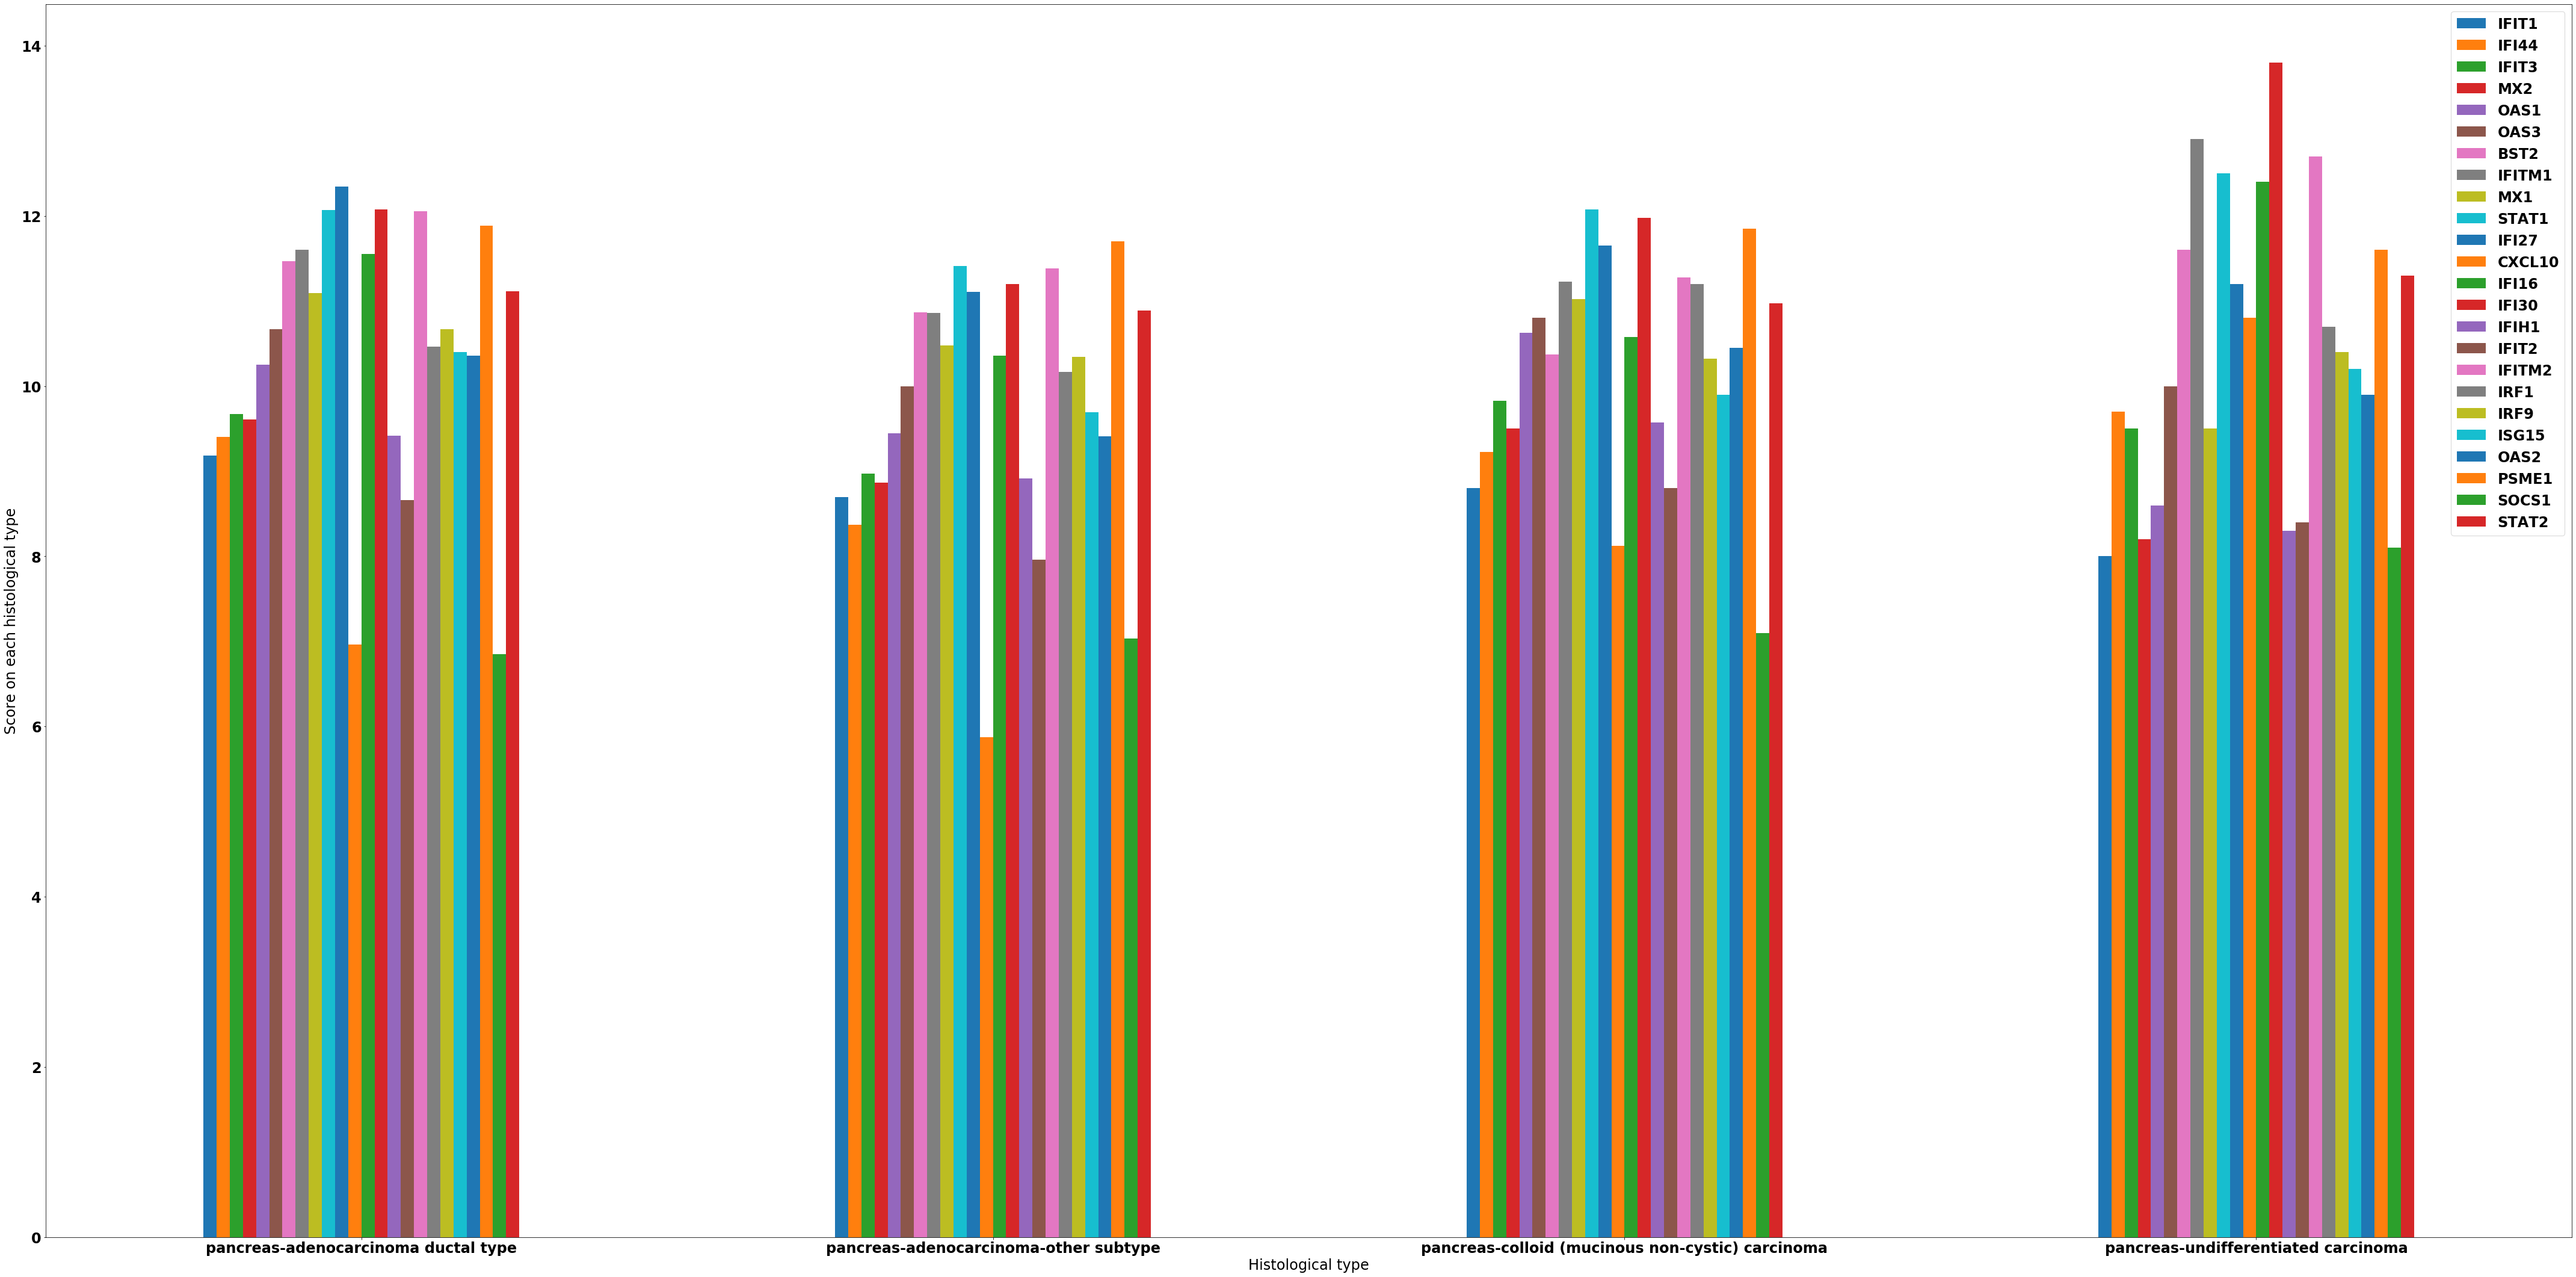

In [79]:
#plotting bar plot of histological type and their correspnding inferons score
ax=x2.T.plot.bar(figsize = (60, 30),rot=0)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Histological type')
plt.ylabel('Score on each histological type')
plt.tight_layout()
plt.show()

**We can characterize the presence of IFN signature in pancreatic adenocarcinoma tumors and also assigned score to each gene per histological type by taking sum of each the sample gene divide by count of each sample.**